### Precision and Recall in ML

In [20]:
import numpy as np
import pandas as pd

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
df=pd.read_csv('heart_v2.csv')
df.head(2)

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0


In [23]:
df['target']=df['heart disease']

In [24]:
df.head(2)

,age,sex,BP,cholestrol,heart disease,target
0,70,1,130,322,1,1
1,67,0,115,564,0,0


In [25]:
del df['heart disease']

In [26]:
df.head(2)

,age,sex,BP,cholestrol,target
0,70,1,130,322,1
1,67,0,115,564,0


In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
X=df.drop('target',axis=1)
y=df.target

In [29]:
type(y)

pandas.core.series.Series

In [30]:
type(X)

pandas.core.frame.DataFrame

In [31]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X[['sex']] = ss.fit_transform(X[['sex']])

In [32]:
X[0:2]

,age,sex,BP,cholestrol
0,70,0.689500,130,322
1,67,-1.450327,115,564


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 70% training and 30% test

In [34]:
train_score = []
test_score = []
k_values = []

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
for k in range(1, 21):
    k_values.append(k)
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    
    train_score.append(knn.score(X_train, y_train))
    test_score.append(knn.score(X_test, y_test))

In [37]:
max_test_score = max(test_score)

In [38]:
test_scores_ind = [i for i, j in enumerate(test_score) if j == max_test_score]
print('Max test score {} and k = {}'.format(max_test_score * 100, list(map(lambda x: x + 1, test_scores_ind))))

Max test score 69.1358024691358 and k = [18]


    Thus, we have obtained the optimum value of k to be 3, 11, or 20 with a score of 83.5. We will finalize one of these values and fit the model accordingly:

In [39]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(3)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.49382716049382713

In [40]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(2)

knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.5555555555555556

In [41]:
from sklearn.metrics import confusion_matrix

In [42]:
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,35,16,51
1,20,10,30
All,55,26,81


### What is Precision??

    Precision is the ratio between the True Positives and to the all cases

    Precision=TP/(TP+FP)

    if Precision for our model is 0.843 or, when it predicts that a patient has heart disease, it is correct around 84% of the time.

### What is recall in Model Evaluation?

    Ration of True Positive to the actual Positive..

    recall=TP/(TP+FN)  -- here FN means it was also positive but our model predicted it negative thus false negative. 

    Recall also gives a measure of how accurately our model is able to identify the relevant data. We refer to it as Sensitivity or True Positive Rate


    if recall is high, that would mean model is more likely to predict the patient doesn't have a heart disease but he has.

#### The Easiest Metric to Understand – Accuracy 

    Ratio of the total number of correct predictions and the total number of predictions

    accuracy= TP+TN/(TP+TN+FP+FN)

    We need a tradeoff between Precision and Recall. We first need to decide which is more important for our classification problem

In [45]:
# What is f1-score? when do we need it??

    When precision and recall are equally important for us, than we need to find f1-score, since it is the harmonnic mean of precision and recall.
    f1=score= 2 * (precision x recall)/(precision+recall)   

In [47]:
from sklearn.metrics import f1_score

In [48]:
f1_score(y_test,y_pred)
# We can also compute it using classification report

0.3571428571428571

In [49]:
# ROC CURVE??

    FALSE POSITIVE RATE:
    ratio of the False Positives to the Actual number of Negatives.

    True Negative Rate: Ratio of the True Negatives and the Actual Number of Negatives.
    TNR = 1 – FPR

In [50]:
# 1. ROC Curves(Receiver Operating Characteristic Curve):

    It is the plot between the TPR(y-axis) and FPR(x-axis). Since our model classifies the patient as having heart disease or not based on the probabilities generated for each class, we can decide the threshold of the probabilities as well.

    For example, we want to set a threshold value of 0.4. This means that the model will classify the datapoint/patient as having heart disease if the probability of the patient having a heart disease is greater than 0.4.

In [51]:
# Let us generate a ROC curve for our model with k = 3.

In [52]:
from sklearn.metrics import roc_curve,roc_auc_score,precision_recall_curve

In [53]:
y_pred_proba=knn.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,y_pred_proba)

In [54]:
roc_auc_score(y_test, y_pred_proba)

0.5473856209150327

    This means that the model will be able to distinguish the patients with heart disease and those who don’t 69% of the time.

In [55]:
# 2. Precision-Recall Curve (PRC)

- this curve is a direct representation of the precision(y-axis) and the recall(x-axis)

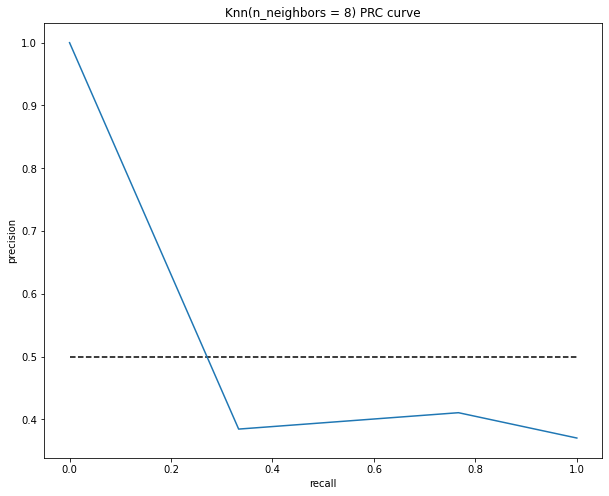

In [56]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize = (10,8))
plt.plot([0, 1], [0.5, 0.5],'k--')
plt.plot(recall, precision, label = 'Knn')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Knn(n_neighbors = 8) PRC curve')
plt.show()

    PRC Interpretation:
    At the lowest point, i.e. at (0, 0)- the threshold is set at 1.0. This means our model makes no distinctions between the patients who have heart disease and the patients who don’t.

    At the highest point i.e. at (1, 1), the threshold is set at 0.0. This means that both our precision and recall are high and the model makes distinctions perfectly.

    The rest of the curve is the values of Precision and Recall for the threshold values between 0 and 1. Our aim is to make the curve as close to (1, 1) as possible- meaning a good precision and recall.

    Similar to ROC, the area with the curve and the axes as the boundaries is the Area Under Curve(AUC). Consider this area as a metric of a good model. The AUC ranges from 0 to 1. Therefore, we should aim for a high value of AUC. Let us compute the AUC for our model and the above plot.

In [57]:
# what is the difference between precision and recall-WIKIPEDIA??

    Recall is the number of relevant documents retrieved by a search divided by the total number of existing relevant documents, while precision is the number of relevant documents retrieved by a search divided by the total number of documents retrieved by that search.

    MACHINELEARNINGMASTERY.COM
    Precision quantifies the number of positive class predictions that actually belong to the positive class. Recall quantifies the number of positive class predictions made out of all positive examples in the dataset.
    
    Precision= TP/TP+FP
    Recall= TP/TP+FN

In [58]:
# When do we eed high precision or high recall?

    Models need high recall when you need output-sensitive predictions. For example, predicting cancer or predicting terrorists needs a high recall, in other words, you need to cover false negatives as well. It is ok if a non-cancer tumor is flagged as cancerous but a cancerous tumor should not be labeled non-cancerous.

    Similarly, we need high precision in places such as recommendation engines, spam mail detection, etc. Where you don’t care about false negatives but focus more on true positives and false positives. It is ok if spam comes into the inbox folder but a really important mail shouldn’t go into the spam folder.

In [59]:
# End